In [25]:
import pandas as pd

df_ks = pd.read_csv('ks-projects-201801.csv')
df_ks

ID                                               name  \
0       1000002330                    The Songs of Adelaide & Abullah   
1       1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2       1000004038                                     Where is Hank?   
3       1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4       1000011046  Community Film Project: The Art of Neighborhoo...   
...            ...                                                ...   
378656   999976400  ChknTruk Nationwide Charity Drive 2014 (Canceled)   
378657   999977640                                          The Tribe   
378658   999986353  Walls of Remedy- New lesbian Romantic Comedy f...   
378659   999987933                           BioDefense Education Kit   
378660   999988282                  Nou Renmen Ayiti!  We Love Haiti!   

               category main_category currency    deadline     goal  \
0                Poetry    Publishing      GBP  2015-10-09   1000.0   
1        Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2        Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3                 Music         Music      USD  2012-04-16   5000.0   
4          Film & Video  Film & Video      USD  2015-08-29  19500.0   
...                 ...           ...      ...         ...      ...   
378656      Documentary  Film & Video      USD  2014-10-17  50000.0   
378657   Narrative Film  Film & Video      USD  2011-07-19   1500.0   
378658   Narrative Film  Film & Video      USD  2010-08-16  15000.0   
378659       Technology    Technology      USD  2016-02-13  15000.0   
378660  Performance Art           Art      USD  2011-08-16   2000.0   

                   launched  pledged     state  backers country  usd pledged  \
0       2015-08-11 12:12:28      0.0    failed        0      GB          0.0   
1       2017-09-02 04:43:57   2421.0    failed       15      US        100.0   
2       2013-01-12 00:20:50    220.0    failed        3      US        220.0   
3       2012-03-17 03:24:11      1.0    failed        1      US          1.0   
4       2015-07-04 08:35:03   1283.0  canceled       14      US       1283.0   
...                     ...      ...       ...      ...     ...          ...   
378656  2014-09-17 02:35:30     25.0  canceled        1      US         25.0   
378657  2011-06-22 03:35:14    155.0    failed        5      US        155.0   
378658  2010-07-01 19:40:30     20.0    failed        1      US         20.0   
378659  2016-01-13 18:13:53    200.0    failed        6      US        200.0   
378660  2011-07-19 09:07:47    524.0    failed       17      US        524.0   

        usd_pledged_real  usd_goal_real  
0                    0.0        1533.95  
1                 2421.0       30000.00  
2                  220.0       45000.00  
3                    1.0        5000.00  
4                 1283.0       19500.00  
...                  ...            ...  
378656              25.0       50000.00  
378657             155.0        1500.00  
378658              20.0       15000.00  
378659             200.0       15000.00  
378660             524.0        2000.00  

[378661 rows x 15 columns]

In [26]:
df_ks.country.nunique()

23

In [27]:
df_country = df_ks.country.unique()

In [28]:
df_country

array(['GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', 'ES', 'N,0"',
       'SE', 'FR', 'NL', 'NZ', 'CH', 'AT', 'DK', 'BE', 'HK', 'LU', 'SG',
       'JP'], dtype=object)

In [29]:
df_kscountry = df_ks['country'].value_counts().rename_axis('Country').reset_index(name='Count')
df_kscountry

Country   Count
0       US  292627
1       GB   33672
2       CA   14756
3       AU    7839
4       DE    4171
5     N,0"    3797
6       FR    2939
7       IT    2878
8       NL    2868
9       ES    2276
10      SE    1757
11      MX    1752
12      NZ    1447
13      DK    1113
14      IE     811
15      CH     761
16      NO     708
17      HK     618
18      BE     617
19      AT     597
20      SG     555
21      LU      62
22      JP      40

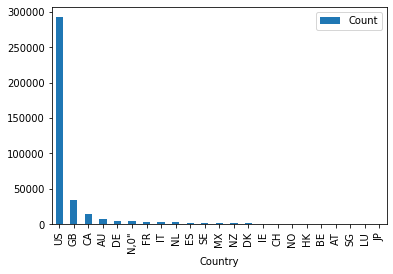

In [30]:
import matplotlib.pyplot as plt
kscountryPlot = df_kscountry.plot.bar('Country','Count')

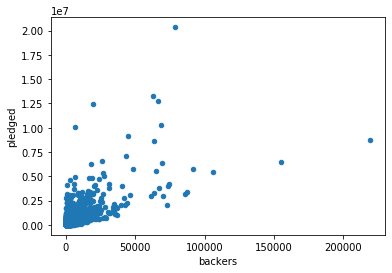

In [31]:
ksBackerPlot = df_ks.plot.scatter('backers','pledged')

## Starting the ML Linear Regression

In [39]:
X = df_ks[['pledged']]
y = df_ks['backers']

display(X)
display(y)

pledged
0           0.0
1        2421.0
2         220.0
3           1.0
4        1283.0
...         ...
378656     25.0
378657    155.0
378658     20.0
378659    200.0
378660    524.0

[378661 rows x 1 columns]

0          0
1         15
2          3
3          1
4         14
          ..
378656     1
378657     5
378658     1
378659     6
378660    17
Name: backers, Length: 378661, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

display(X_train)
display(X_test)

pledged
141518    207.66
320371  11575.00
211472    342.00
271392   2400.00
83646      30.00
...          ...
359783   1800.00
358083    740.00
152315    363.00
117952      0.00
305711   6775.00

[302928 rows x 1 columns]

pledged
338862      0.0
277871     51.0
47000      25.0
111338    585.0
53743      25.0
...         ...
114927     97.0
279387  10334.0
155653   5230.0
295874    967.0
207797  11287.0

[75733 rows x 1 columns]

In [41]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

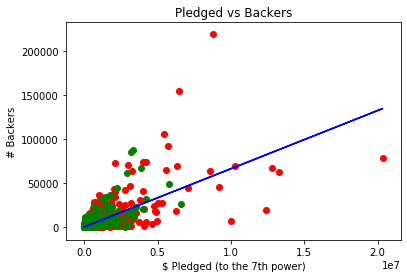

In [56]:
import matplotlib.pyplot as plt

plt.plot(X_train, model.predict(X_train), color='blue')

plt.scatter(X_train, y_train, color='red')

plt.scatter(X_test, y_test, color='green')

plt.xlabel('$ Pledged (to the 7th power)')

plt.ylabel('# Backers')

plt.title('Pledged vs Backers')

plt.show()

In [60]:
model.predict(pd.DataFrame([2000])) # Predict if you have $2000 pledged, how many backers do you have?

array([54.41234449])

In [58]:
from sklearn.metrics import r2_score
r2_score(y_test, model.predict(X_test)) #How accurate is the prediction? 52% in this case becasue the data is so random

0.521624758107101